# **Analyse d'un dataset sur les élus départementaux français**
 --------------------------------------------

## 1 . Premier traitement de la base de donnée


### 1.1 Lecture des données et premières observations

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [85]:
dfbase=pd.read_csv("elus-conseillers-departementaux-cd.csv", sep= ';')
dfbase.head()

,Code du département,Libellé du département,Code du canton,Libellé du canton,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Date de début du mandat,Libellé de la fonction,Date de début de la fonction
0,01,Ain,101,Ambérieu-En-Bugey,BRUNET,Joël,M,02/05/1955,23,Chef d'entreprise de 10 salariés ou plus,01/07/2021,NaN,NaN
1,01,Ain,101,Ambérieu-En-Bugey,PETIT,Aurélie,F,29/08/1982,38,Ingénieur et cadre technique d'entreprise,01/07/2021,NaN,NaN
2,01,Ain,102,Attignat,FOURNIER,Clotilde,F,01/09/1966,35,"Profession de l'information, des arts et des s...",01/07/2021,9ème Vice-président du conseil départemental,01/07/2021
3,01,Ain,102,Attignat,MARTIN,Walter,M,07/05/1966,38,Ingénieur et cadre technique d'entreprise,01/07/2021,NaN,NaN
4,01,Ain,103,Valserhône,LARMANJAT,Guy,M,28/09/1962,38,Ingénieur et cadre technique d'entreprise,01/07/2021,NaN,NaN


In [86]:
dfbase.tail()

,Code du département,Libellé du département,Code du canton,Libellé du canton,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Date de début du mandat,Libellé de la fonction,Date de début de la fonction
4042,976,Mayotte,97612,Sada,IBRAHIM,Tahamida,F,25/06/1978,42,"Professeur des écoles, instituteur et assimilé",01/07/2021,2ème Vice-président du conseil départemental,02/07/2021
4043,976,Mayotte,97612,Sada,IBRAHIM,Tahamida,F,25/06/1978,42,"Professeur des écoles, instituteur et assimilé",01/07/2021,Président de commission du conseil départemental,02/07/2021
4044,976,Mayotte,97612,Sada,KAMARDINE,Mansour,M,23/03/1959,31,Profession libérale,01/07/2021,NaN,NaN
4045,976,Mayotte,97613,Tsingoni,OUSSENI,Ben Issa,M,11/07/1973,22,Commerçant et assimilé,01/07/2021,Président du conseil départemental,02/07/2021
4046,976,Mayotte,97613,Tsingoni,SAINDOU,Zaounaki,F,12/03/1981,45,Profession intermédiaire administrative de la ...,01/07/2021,NaN,NaN


In [87]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Code du département                            4047 non-null   object
 1   Libellé du département                         4047 non-null   object
 2   Code du canton                                 4047 non-null   int64 
 3   Libellé du canton                              4047 non-null   object
 4   Nom de l'élu                                   4047 non-null   object
 5   Prénom de l'élu                                4047 non-null   object
 6   Code sexe                                      4047 non-null   object
 7   Date de naissance                              4047 non-null   object
 8   Code de la catégorie socio-professionnelle     4047 non-null   int64 
 9   Libellé de la catégorie socio-professionnelle  4047 non-null   

<br>**Premières observations** : 

- Les types : les dates seraient plus manipulables en *Datetime* et certains *object* peuvent être changés en *int*.
- On remarque que certains doublons, tel Tahamida IBRAHIM, occupent deux fonctions différentes.
- Les élus n'occupant aucune fonction supplémentaire à leur mandat ont pour valeur *NaN* en "Libellé de la fonction" et "Date de début de la fonction".

**Y-a-t-il à vue d'oeil des valeurs inattendues dans les différentes colonnes ?** 

In [88]:
dfbase["Code du département"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '69',
       '6AE', '70', '71', '72', '73', '74', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91',
       '92', '93', '94', '95', '971', '974', '976'], dtype=object)

- On observe une valeur 6AE 
- On remarque aussi qu'il manque certains départements comme Paris (qui n'a pas besoin d'élus départementaux, car la ville de Paris est à la fois une commune et un département, on imagine donc que l'administration est réalisée par les élus municipaux) ou les départements corses.

In [89]:
dfbase["Libellé du département"].unique()

array(['Ain', 'Aisne', 'Allier', 'Alpes-De-Haute-Provence',
       'Hautes-Alpes', 'Alpes-Maritimes', 'Ardèche', 'Ardennes', 'Ariège',
       'Aube', 'Aude', 'Aveyron', 'Bouches-Du-Rhône', 'Calvados',
       'Cantal', 'Charente', 'Charente-Maritime', 'Cher', 'Corrèze',
       "Côte-D'Or", "Côtes-D'Armor", 'Creuse', 'Dordogne', 'Doubs',
       'Drôme', 'Eure', 'Eure-Et-Loir', 'Finistère', 'Gard',
       'Haute-Garonne', 'Gers', 'Gironde', 'Hérault', 'Ille-Et-Vilaine',
       'Indre', 'Indre-Et-Loire', 'Isère', 'Jura', 'Landes',
       'Loir-Et-Cher', 'Loire', 'Haute-Loire', 'Loire-Atlantique',
       'Loiret', 'Lot', 'Lot-Et-Garonne', 'Lozère', 'Maine-Et-Loire',
       'Manche', 'Marne', 'Haute-Marne', 'Mayenne', 'Meurthe-Et-Moselle',
       'Meuse', 'Morbihan', 'Moselle', 'Nièvre', 'Nord', 'Oise', 'Orne',
       'Pas-De-Calais', 'Puy-De-Dôme', 'Pyrénées-Atlantiques',
       'Hautes-Pyrénées', 'Pyrénées-Orientales', 'Rhône',
       "Collectivité Européenne d'Alsace", 'Haute-Saône',
    

- Toutes les valeurs sont conformes ici, mais on ne voit ni le Haut Rhin ni le Bas Rhin, qui sont regroupés sous le libellé "Collectivité Européenne d'Alsace". En regardant plus précisément, on remarque que c'est pour les cantons d'Alsace qu'on a la valeur aberrante 6AE, que l'on va corriger par la suite.

In [90]:
dfbase["Code de la catégorie socio-professionnelle"].unique()

array([ 23,  38,  35,  46,  43,  75,  33,  86,  34,  31,  37,  72,  77,
        74,  85,  54,  64,  52,  45,  71,  22,  12,  42,  69,  53,  55,
        65,  13,  11,  48,  47,  21,  63, 109,  56, 163,  78,  83,  84,
        62, 165, 156, 120, 149, 144, 124, 119, 162])

- Toutes les valeurs sont conformes mais certaines correspondent à une ancienne classification des catégories socio-professionnelles.

In [91]:
dfbase['Code sexe'].unique() 

array(['M', 'F'], dtype=object)

- Toutes les valeurs sont conformes.

### 1.2 Premières corrections

- Commençons par supprimer les colonnes que nous ne souhaitons pas analyser: 
   - Date de début du mandat
   - Date de début de la fonction <br><br>
Ces deux colonnes sont quasiment identiques, les différence corrrespondent surement à des changements de fonction dus à des évènments ponctuels dont les informations sortent du cadre de cette analyse.

In [92]:
dfbase=dfbase.drop(columns='Date de début de la fonction')
dfbase=dfbase.drop(columns='Date de début du mandat')

- Transformons en *Datetime* les dates de naissance

In [93]:
dfbase['Date de naissance']=pd.to_datetime(dfbase['Date de naissance'], dayfirst=True)

 - Débarassons nous des doublons : <br>
Ce ne sont pas vraiment des doublons au vu du libellé de la fonction qui est différent mais on souhaite ici simplifier le dataset pour permettre des analyses plus pertinents. <br>
On les élimine, en observant toutes les colonnes sauf la dernière.

In [94]:
print("forme avant de supprimer les doublons ",dfbase.shape)
dfbase = dfbase.drop_duplicates(subset=dfbase.columns[:-1])
print("forme après avoir supprimer les doublons ",dfbase.shape)

forme avant de supprimer les doublons  (4047, 11)
forme après avoir supprimer les doublons  (4035, 11)


Il y avait 12 doublons

- Débarassons nous de l'erreur 6AE <br>
  On remplace ici le code du département problématique à partir du code du canton qui est plus pertinent.

In [95]:
dfbase6AE=dfbase[dfbase["Code du département"]=='6AE']
dfbase6AElist=dfbase6AE.index[:].to_list()
dfbase.iloc[dfbase6AElist,[dfbase.columns.get_loc("Code du département")]]=dfbase.iloc[dfbase6AElist,[dfbase.columns.get_loc('Code du canton')]]//100
dfbase.iloc[dfbase6AElist]

,Code du département,Libellé du département,Code du canton,Libellé du canton,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Libellé de la fonction
2817,67,Collectivité Européenne d'Alsace,6701,Bischwiller,ISSELÉ,Christelle,F,1978-05-15,22,Commerçant et assimilé,NaN
2818,67,Collectivité Européenne d'Alsace,6701,Bischwiller,LORENTZ,Michel,M,1978-10-26,33,Cadre de la fonction publique,NaN
2819,67,Collectivité Européenne d'Alsace,6702,Bouxwiller,KRIEGER,Laurent,M,1982-04-21,38,Ingénieur et cadre technique d'entreprise,NaN
2820,67,Collectivité Européenne d'Alsace,6702,Bouxwiller,LEHMANN,Marie-Paule,F,1955-06-02,86,Personne diverse sans activité professionnelle...,NaN
2821,67,Collectivité Européenne d'Alsace,6703,Brumath,WOLF,Etienne,M,1955-12-18,42,"Professeur des écoles, instituteur et assimilé",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2892,68,Collectivité Européenne d'Alsace,6815,Sainte-Marie-Aux-Mines,HELDERLE,Emilie,F,1976-04-07,42,"Professeur des écoles, instituteur et assimilé",NaN
2893,68,Collectivité Européenne d'Alsace,6816,Wintzenheim,MARTIN,Monique,F,1949-07-22,74,Ancien cadre,NaN
2894,68,Collectivité Européenne d'Alsace,6816,Wintzenheim,MULLER,Lucien,M,1952-01-06,74,Ancien cadre,NaN
2895,68,Collectivité Européenne d'Alsace,6817,Wittenheim,VALLAT,Marie-France,F,1952-11-13,74,Ancien cadre,NaN


- Convertissons en *int* la colonne "Code du département"

In [96]:
dfbase["Code du département"]=dfbase["Code du département"].astype('int64')

- Les départements alsaciens sont toujours sous le libellé "Collectivité Européenne d'Alsace", on va séparer le Haut-Rhin et le Bas-Rhin

In [97]:
dfbase67=dfbase[dfbase["Code du département"]==67]
dfbase68=dfbase[dfbase["Code du département"]==68]
dfbase67list=dfbase67.index[:].to_list()
dfbase68list=dfbase68.index[:].to_list()
dfbase.iloc[dfbase67list,[dfbase.columns.get_loc("Libellé du département")]]="Bas-Rhin"
dfbase.iloc[dfbase68list,[dfbase.columns.get_loc("Libellé du département")]]="Haut-Rhin"
dfbase.iloc[dfbase6AElist]

,Code du département,Libellé du département,Code du canton,Libellé du canton,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Libellé de la fonction
2817,67,Bas-Rhin,6701,Bischwiller,ISSELÉ,Christelle,F,1978-05-15,22,Commerçant et assimilé,NaN
2818,67,Bas-Rhin,6701,Bischwiller,LORENTZ,Michel,M,1978-10-26,33,Cadre de la fonction publique,NaN
2819,67,Bas-Rhin,6702,Bouxwiller,KRIEGER,Laurent,M,1982-04-21,38,Ingénieur et cadre technique d'entreprise,NaN
2820,67,Bas-Rhin,6702,Bouxwiller,LEHMANN,Marie-Paule,F,1955-06-02,86,Personne diverse sans activité professionnelle...,NaN
2821,67,Bas-Rhin,6703,Brumath,WOLF,Etienne,M,1955-12-18,42,"Professeur des écoles, instituteur et assimilé",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2892,68,Haut-Rhin,6815,Sainte-Marie-Aux-Mines,HELDERLE,Emilie,F,1976-04-07,42,"Professeur des écoles, instituteur et assimilé",NaN
2893,68,Haut-Rhin,6816,Wintzenheim,MARTIN,Monique,F,1949-07-22,74,Ancien cadre,NaN
2894,68,Haut-Rhin,6816,Wintzenheim,MULLER,Lucien,M,1952-01-06,74,Ancien cadre,NaN
2895,68,Haut-Rhin,6817,Wittenheim,VALLAT,Marie-France,F,1952-11-13,74,Ancien cadre,NaN


## 2 . Pré-analyse

 ### 2.1 État du dataframe

 - **Code du département** : *Int64* numéro du département
 - **Libellé du département** : *Object* nom du département
 - **Code du canton** : *Int64* Code du canton (un peu comme le code postal mais pour un canton = regroupement de communes))
 - **Libellé du canton** : *Object* Nom du canton
 - **Nom de l'élu** : *Object* Nom de l'élu
 - **Prénom de l'élu** : *Object* Prénom de l'élu
 - **Code sexe** : *Object* Homme 'M', Femme 'F'
 - **Date de naissance** : *Date time* Date de naissance de l'élu
 - **Code de la catégorie socio-professionnelle** : *int64* Indique la cathégorie socio-professionelle par un nombre
 - **Libellé de la catégorie socio-professionnelle** : *Object* Ce nombre correspond à une cathégorie socio-professionelle dont voici le nom
 - **Libellé de la fonction** *Object* Lorsqu'ils ont une fontion supplémentaire au sein du conseil départemental, cette fonction est affichée ici

In [98]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4035 entries, 0 to 4046
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Code du département                            4035 non-null   int64         
 1   Libellé du département                         4035 non-null   object        
 2   Code du canton                                 4035 non-null   int64         
 3   Libellé du canton                              4035 non-null   object        
 4   Nom de l'élu                                   4035 non-null   object        
 5   Prénom de l'élu                                4035 non-null   object        
 6   Code sexe                                      4035 non-null   object        
 7   Date de naissance                              4035 non-null   datetime64[ns]
 8   Code de la catégorie socio-professionnelle     4035 non-null   

### 2.2 Ajout d'informations

#### 2.2.1 Age des élus

- On ajoute une colonne qui donne l'âge des élus

In [99]:
dateactuelle = datetime.now()
unan=(datetime(2026,1,1)-datetime(2025,1,1))
dfbase["Age"]=(dateactuelle-dfbase["Date de naissance"])//unan
dfbase

,Code du département,Libellé du département,Code du canton,Libellé du canton,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Libellé de la fonction,Age
0,1,Ain,101,Ambérieu-En-Bugey,BRUNET,Joël,M,1955-05-02,23,Chef d'entreprise de 10 salariés ou plus,NaN,70
1,1,Ain,101,Ambérieu-En-Bugey,PETIT,Aurélie,F,1982-08-29,38,Ingénieur et cadre technique d'entreprise,NaN,43
2,1,Ain,102,Attignat,FOURNIER,Clotilde,F,1966-09-01,35,"Profession de l'information, des arts et des s...",9ème Vice-président du conseil départemental,59
3,1,Ain,102,Attignat,MARTIN,Walter,M,1966-05-07,38,Ingénieur et cadre technique d'entreprise,NaN,59
4,1,Ain,103,Valserhône,LARMANJAT,Guy,M,1962-09-28,38,Ingénieur et cadre technique d'entreprise,NaN,63
...,...,...,...,...,...,...,...,...,...,...,...,...
4041,976,Mayotte,97611,Pamandzi,ZAIDANI,Daniel,M,1975-05-14,37,Cadre administratif et commercial d'entreprise,NaN,50
4042,976,Mayotte,97612,Sada,IBRAHIM,Tahamida,F,1978-06-25,42,"Professeur des écoles, instituteur et assimilé",2ème Vice-président du conseil départemental,47
4044,976,Mayotte,97612,Sada,KAMARDINE,Mansour,M,1959-03-23,31,Profession libérale,NaN,66
4045,976,Mayotte,97613,Tsingoni,OUSSENI,Ben Issa,M,1973-07-11,22,Commerçant et assimilé,Président du conseil départemental,52


On a donc une nouvelle collone :

 - **Age** *int64* 

#### 2.2.2 Catégorie socio-professionelle

In [22]:
dfbase['Code de la catégorie socio-professionnelle'].unique()

array([ 23,  38,  35,  46,  43,  75,  33,  86,  34,  31,  37,  72,  77,
        74,  85,  54,  64,  52,  45,  71,  22,  12,  42,  69,  53,  55,
        65,  13,  11,  48,  47,  21,  63, 109,  56, 163,  78,  83,  84,
        62, 165, 156, 120, 149, 144, 124, 119, 162])

On observe de nombreux codes différents, certains sont obsolètes ou mal renseignés au vu des normes changeant avec le temps, il faut malheureusement procéder à un tri manuel.
De plus, il y a trop de catégories, nous allons donc les regrouper dans les catégories suivantes : 
<ol>
<li>Agriculteurs exploitants : <br>	</li><br>
    11	Agriculteurs sur petite exploitation<br>
    12	Agriculteurs sur moyenne exploitation <br>
    13	Agriculteurs sur grande exploitation<br><br>
<li>Artisans, commerçants et chefs d’entreprise	</li><br>
    21	Artisan<br>
    22	Commerçant et assimilés<br>
    23	Chefs d’entreprise de 10 salariés ou plus<br><br>
<li>Cadres et professions intellectuelles supérieures	</li><br><br>
    31	Professions libérales<br>
    33	Cadres de la fonction publique<br>
    34	Professeurs, professions scientifiques<br>
    35	Professions de l’information, des arts et des spectacles<br>
    37	Cadres administratifs et commerciaux d’entreprise<br>
    38	Ingénieurs et cadres techniques d’entreprise<br><br>
<li>Professions intermédiaires</li>	<br><br>
    42	Professeurs des écoles, instituteurs et assimilés<br>
    43	Professions intermédiaires de la santé et du travail social<br>
    44	Clergé, religieux<br>
    45	Professions intermédiaires administratives de la fonction publique<br>
    46	Professions intermédiaires administratives et commerciales des entreprises<br>
    47	Techniciens<br>
    48	Contremaîtres, agents de maîtrise<br><br>
<li>Employés</li>	<br><br>
    52	Employés civils et agents de service de la fonction publique<br>
    53	Policiers et militaires<br>
    54	Employés administratifs d’entreprise<br>
    55	Employés de commerce<br>
    56	Personnels des services directs aux particuliers<br><br>
<li>Ouvriers</li>	<br><br>
    62	Ouvriers qualifiés de type industriel<br>
    63	Ouvriers qualifiés de type artisanal<br>
    64	Chauffeurs<br>
    65	Ouvriers qualifiés de la manutention, du magasinage et du transport<br>
    67	Ouvriers non qualifiés de type industriel<br>
    68	Ouvriers non qualifiés de type artisanal<br>
    69	Ouvriers agricoles<br><br>
<li>Retraités	</li><br><br>
    71	Anciens agriculteurs exploitants<br>
    72	Anciens artisans, commerçants et chefs d’entreprise<br>
    74	Anciens cadres<br>
    75	Anciennes professions intermédiaires<br>
    77	Anciens employés<br>
    78	Anciens ouvriers<br><br>
<li>Autres personnes sans activité professionnelle	</li><br>
    81	Chômeurs n’ayant jamais travaillé<br>
    83	Militaires du contingent<br>
    84	Élèves, étudiants<br>
    85	Personnes diverses sans activité professionnelle de moins de 60 ans (sauf retraités)<br>
    86	Personnes diverses sans activité professionnelle de 60 ans et plus (sauf retraités)<br><br>
</ol>


Ainsi, tous les codes supérieurs ou égaux à 90 sont obsolètes

Manuellement on associe à chacune de ces catégories leur équivalent mis à jour

In [100]:
catsocio=dfbase.groupby(by='Code de la catégorie socio-professionnelle')
new=[22,75,79,49,57,45,42,31,39,75]
i=0
for group, subdf in catsocio:
    if group >=90:
        subdf['Code de la catégorie socio-professionnelle']=new[i]
        i=i+1
        dfbase.loc[subdf.index]=subdf

Vérifions que ça a marché avec le dernier

In [101]:
dfbase['Code de la catégorie socio-professionnelle'].unique()

array([23, 38, 35, 46, 43, 75, 33, 86, 34, 31, 37, 72, 77, 74, 85, 54, 64,
       52, 45, 71, 22, 12, 42, 69, 53, 55, 65, 13, 11, 48, 47, 21, 63, 56,
       39, 78, 83, 84, 62, 79, 57, 49])

On observe que les codes >=90 ont bien été remplacés par les nouveaux codes

- On peut aussi trier moins finement les catégories socio-professionnelles et leur associer les noms déjà explicités précédemment (il sera plus pertinent de regrouper les élus selon ces catégories)

In [102]:
dfbase['Groupe socio-professionnel']=dfbase['Code de la catégorie socio-professionnelle']//10
catsocio=dfbase.groupby(by='Groupe socio-professionnel')
catsocio.size()

Groupe socio-professionnel
1     169
2     265
3    1566
4     572
5     256
6      19
7     931
8     257
dtype: int64

- On a ajouté une nouvelle colonne :<br>             Groupe socio-professionnel où les valeurs sont des *int64*

#### 2.2.2 Groupe d'age

On va regrouper les élus selon leur classe d'age

In [132]:
dfbase['Age-classe']=pd.cut(dfbase['Age'], bins=[20,30,40,50,60,70,80,90], labels=['très jeunes élus', 'jeunes élus','élus','élus moyen','ainés','retraités','anciens'])
dfbase.head()

,Code du département,Libellé du département,Code du canton,Libellé du canton,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Libellé de la fonction,Age,Groupe socio-professionnel,Age-classe
0,1,Ain,101,Ambérieu-En-Bugey,BRUNET,Joël,M,1955-05-02,23,Chef d'entreprise de 10 salariés ou plus,NaN,70,2,ainés
1,1,Ain,101,Ambérieu-En-Bugey,PETIT,Aurélie,F,1982-08-29,38,Ingénieur et cadre technique d'entreprise,NaN,43,3,élus
2,1,Ain,102,Attignat,FOURNIER,Clotilde,F,1966-09-01,35,"Profession de l'information, des arts et des s...",9ème Vice-président du conseil départemental,59,3,élus moyen
3,1,Ain,102,Attignat,MARTIN,Walter,M,1966-05-07,38,Ingénieur et cadre technique d'entreprise,NaN,59,3,élus moyen
4,1,Ain,103,Valserhône,LARMANJAT,Guy,M,1962-09-28,38,Ingénieur et cadre technique d'entreprise,NaN,63,3,ainés


On a ajouté une nouvelle colonne : <br> "Age-classe" où les valeurs sont des *Category*

## 3. Analyse des données

## 3.1 . Nature des données

 - **Code du département** : *Int64* Numéro du département
 - **Libellé du département** : *Object* Nom du département
 - **Code du canton** : *Int64* Code du canton (un peu comme le code postal mais pour un canton = regroupement de communes)
 - **Libellé du canton** : *Object* Nom du canton
 - **Nom de l'élu** : *Object* Nom de l'élu
 - **Prénom de l'élu** : *Object* Prénom de l'élu
 - **Code sexe** : *Object* Homme 'M', Femme 'F'
 - **Date de naissance** : *Date time* Date de naissance de l'élu
 - **Code de la catégorie socio-professionnelle** : *int64* Indique la catégorie socio-professionelle par un nombre
 - **Libellé de la catégorie socio-professionnelle** : *Object* Ce nombre correspond à une catégorie socio-professionelle dont voici le nom
 - **Libellé de la fonction** *Object* Lorsqu'ils ont une fontion supplémentaire au sein du conseil départemental, cette fonction est affichée ici
 - **Age** *int64* Age de l'élu
 - **Groupe socio-professionnel** *int64* Groupe socio-professionnel des élus représenté par un nombre
 - **Age-classe** *Category* Classe d'age de l'élu

### 3.2 Etude de la parité Homme/Femme

#### 3.2.1 Parité Homme/Femme dans l'ensemble des élus

In [104]:
groupsexe=dfbase.groupby(by='Code sexe')
groupsexe.size()

Code sexe
F    2020
M    2015
dtype: int64

<Axes: title={'center': 'Répartition des élus par sexe'}, xlabel='Sexe', ylabel="nombre d'élus">

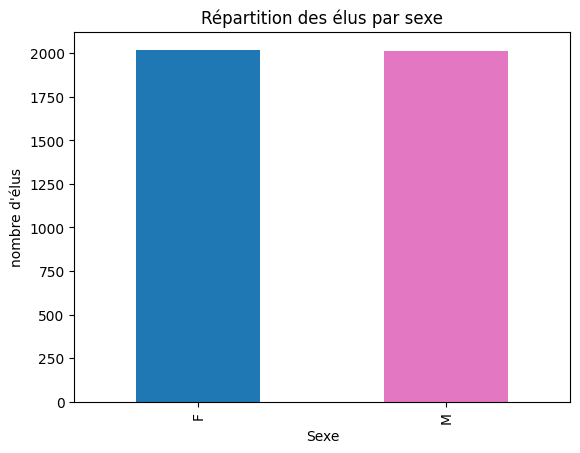

In [107]:
groupsexe.size().plot(kind='bar', xlabel="Sexe", ylabel="nombre d'élus", title="Répartition des élus par sexe", color={"#e377c2", "#1f77b4"})

Il y a 5 femmes de plus que d'hommes. Globalement la parité est respectée.

Cela est surement du à la manière dont sont constitués les binômes élus qui doivent être formé conformément à la loi d'un homme et d'une femme.

#### 3.2.2 Parité Homme/Femme au sein des élus possédant une fonction importante

In [122]:
sexefonction=dfbase.groupby(by=["Libellé de la fonction", "Code sexe"], observed = True)
sexefonction.size()

Libellé de la fonction                            Code sexe
10ème Vice-président du conseil départemental     F            34
                                                  M            37
11ème Vice-président du conseil départemental     F            25
                                                  M            28
12ème Vice-président du conseil départemental     F            25
                                                  M            21
13ème Vice-président du conseil départemental     F            14
                                                  M            14
14ème Vice-président du conseil départemental     F            11
                                                  M             9
15ème Vice-président du conseil départemental     F             6
                                                  M            12
1er Vice-président du conseil départemental       F            42
                                                  M            50
2ème Vice-présid

On remarque qu'il y a 74 hommes présidents du conseil contre seulement 20 femmes.

Plus globalement :

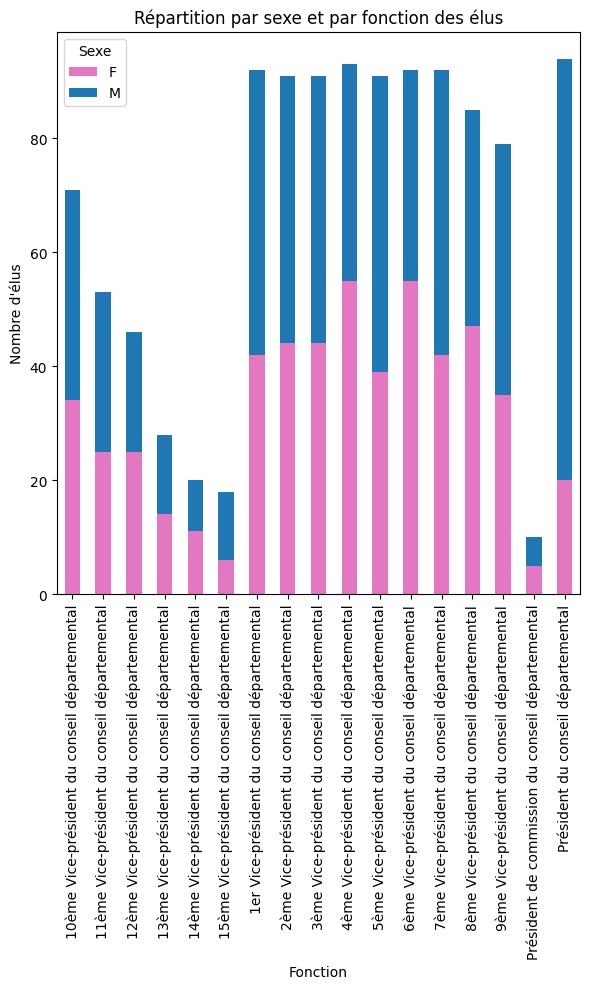

In [129]:
dfplot = sexefonction.size().unstack("Code sexe")


dfplot.plot(kind="bar",stacked=True,color={"F": "#e377c2", "M": "#1f77b4"},figsize=(6, 10))
plt.title("Répartition par sexe et par fonction des élus")
plt.xlabel("Fonction")
plt.ylabel("Nombre d'élus")
plt.xticks(rotation=90)
plt.legend(title="Sexe",loc='upper left')
plt.tight_layout()
plt.show()

### 3.3 Etude de l'age moyen des élus 

#### 3.3.1 Etude de l'age moyen des élus par département

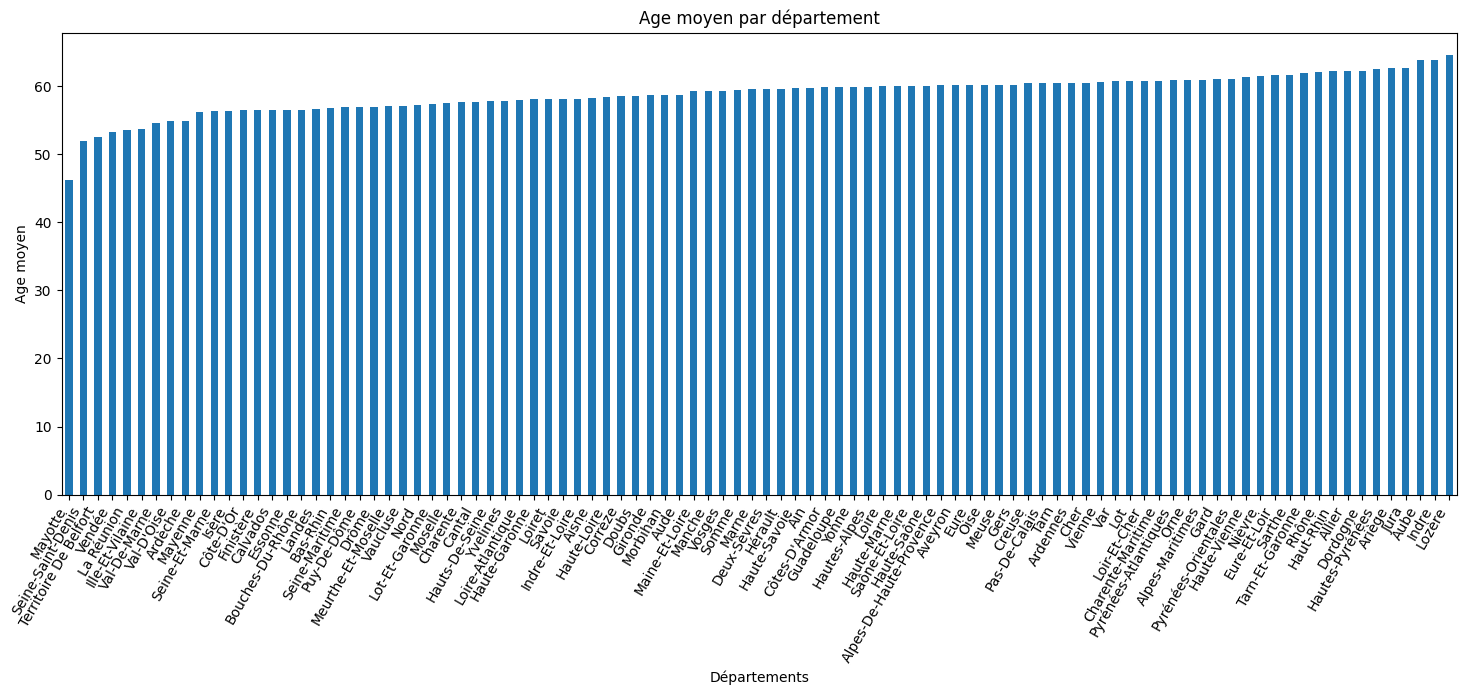

In [113]:
departement=dfbase.groupby(by='Libellé du département')
agedepmean=departement.Age.mean()

plt.figure(figsize=(18, 6) )
agedepmean.sort_values().plot(kind='bar')
plt.title("Age moyen par département")
plt.xlabel("Départements")
plt.ylabel("Age moyen")
plt.xticks(rotation=60, ha='right')  # Rotation de la légende pour pus de lisibilité

plt.show()

On remarque des âges plus bas à la Réunion et à Mayotte ; et plus hauts en Lozère et Indre <br>
En effet, Mayotte est le département le plus jeune de France (plus de la moitié de la population à moins de 17 ans) ce qui est cohérent avec un âge des élus plus faible. <br>De même, l'Indre et la Lozère font partie des 10 départements français où la moyenne d'âge est la plus élevée, ce qui est donc cohérent avec notre graphe.

#### 3.3.2 Etude de l'age moyen des élus par fonction

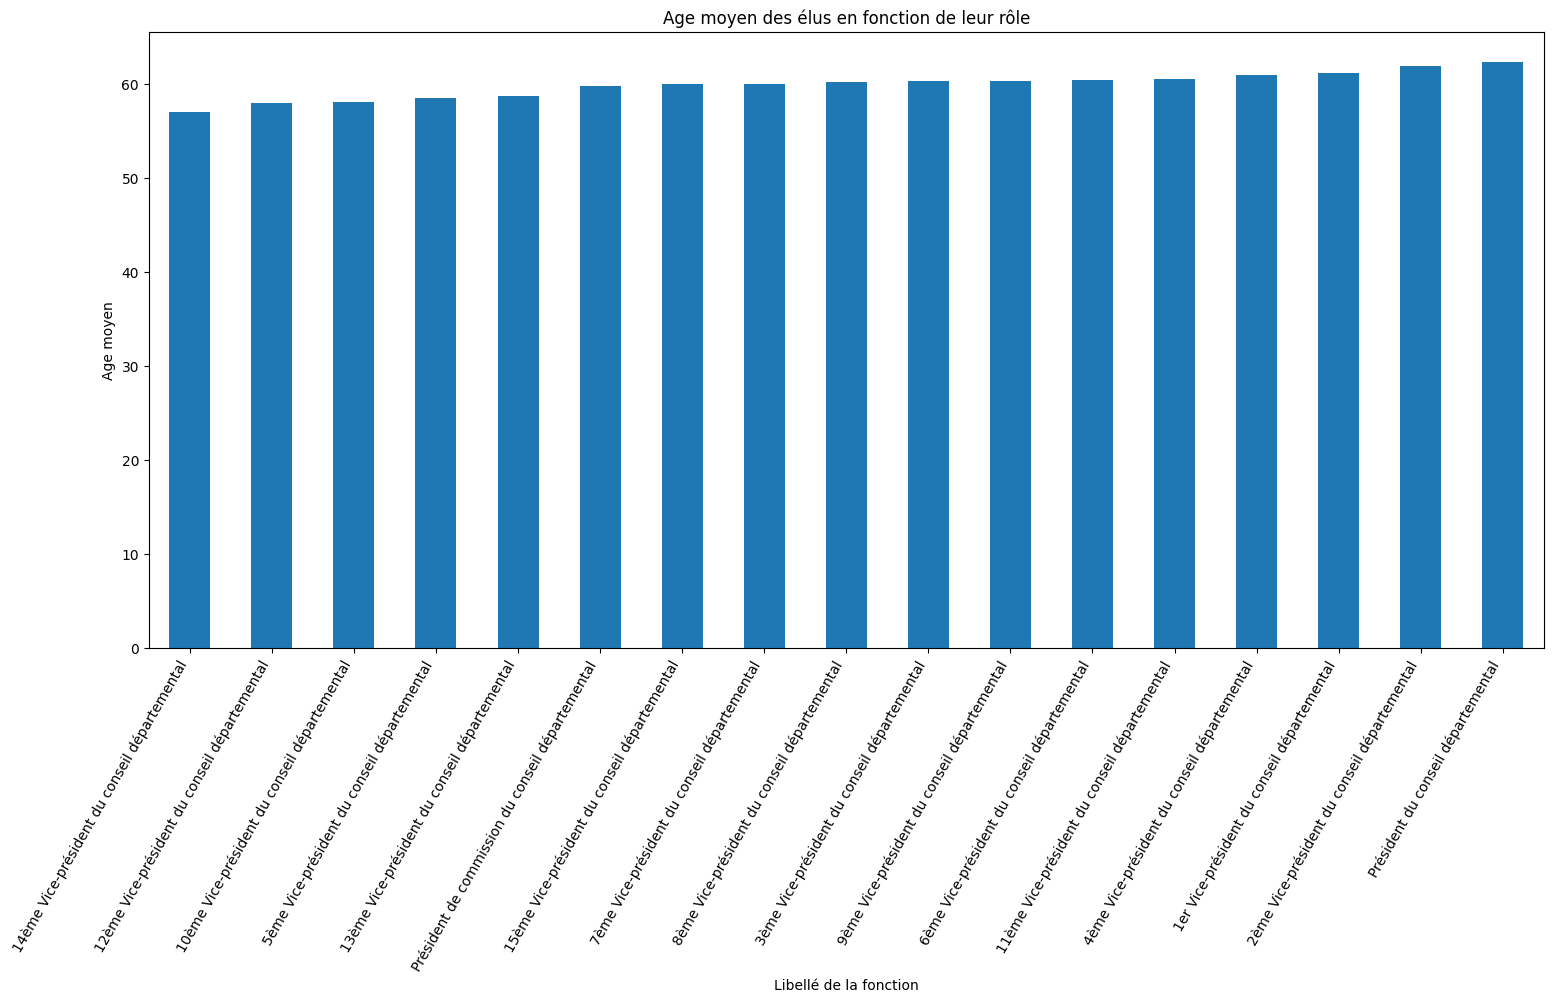

In [121]:
grouppres=dfbase.groupby(by="Libellé de la fonction")


plt.figure(figsize=(18,8))
grouppres["Age"].mean().sort_values().plot(kind='bar')
plt.title("Age moyen des élus en fonction de leur rôle")
plt.ylabel("Age moyen")
plt.xticks(rotation = 60, ha='right')
plt.show()

#### 3.3.3 Comparaison de l'age moyen des élus ayant une fonction particulière et de celui des autres élus

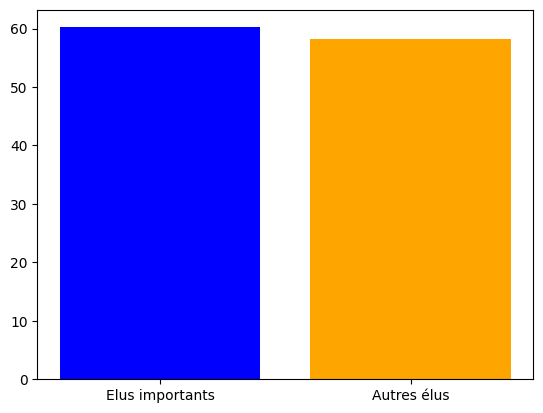

Les grands élus ont en moyenne 60.2 ans alors que les élus de base ont en moyenne 58.2 ans


In [119]:
dfelusbase=dfbase[dfbase["Libellé de la fonction"].isna()]
plt.bar(["Elus importants", "Autres élus"],[dfelusimp.Age.mean(), dfelusbase.Age.mean()], color=['blue','orange'])
plt.show()
print("Les grands élus ont en moyenne", dfelusimp.Age.mean().round(1), "ans alors que les élus de base ont en moyenne",dfelusbase.Age.mean().round(1),"ans")

L'écart est de deux ans : les "grands" élus sont plus vieux, mais la différence n'est pas flagrante.

### 3.4 Etude du nombre d'élus par département

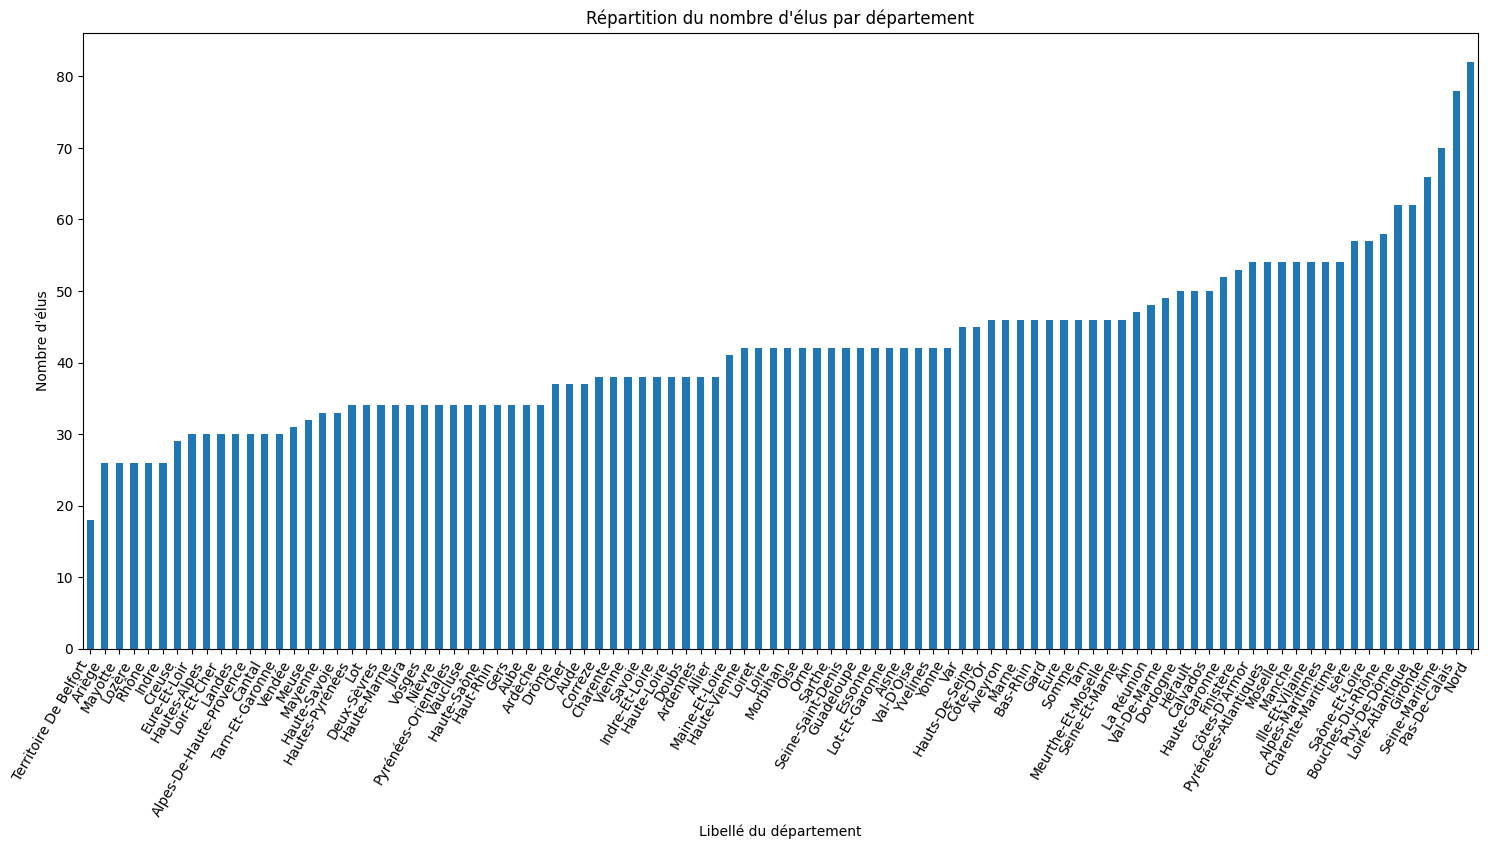

In [111]:
plt.figure(figsize=(18,8))
departement.size().sort_values().plot(kind='bar')
plt.xticks(rotation = 60, ha='right')
plt.title("Répartition du nombre d'élus par département")
plt.ylabel("Nombre d'élus")
plt.show()

A approfondir sur la cohérence avec la population (Nord = deuxième département le plus peuplé il me semble) ==> Rhone Lyon? ville de Lyon pas incluse il me semble

### 3.5 Etude de la répartition des élus par catégorie professionnelle

#### 3.5.1 Répartition de l'ensemble des élus par groupe socio-professionnel

([<matplotlib.patches.Wedge at 0x27fc7eda710>,
 [Text(1.0904912785192833, 0.14432176368579763, 'Agriculteurs exploitants'),
  Text(0.9809805163330154, 0.49767180608811934, 'Artisans, commerçants et chefs d’entreprise'),
  Text(-0.3504898500225891, 1.042668147125989, 'Cadres et professions intellectuelles supérieures'),
  Text(-1.0052480417238143, -0.44662778083146204, 'Professions intermédiaires'),
  Text(-0.535099872481741, -0.9610765455831417, 'Employés'),
  Text(-0.3186729813731502, -1.0528283482803587, 'Ouvriers'),
  Text(0.474238970070401, -0.9925207298926131, 'Retraités'),
  Text(1.0780521566445296, -0.21864022400756628, 'Autres personnes sans activité professionnelle')],
 [Text(0.5948134246468817, 0.07872096201043506, '4.2%'),
  Text(0.5350802816361901, 0.2714573487753378, '6.6%'),
  Text(-0.19117628183050314, 0.5687280802505394, '38.8%'),
  Text(-0.548317113667535, -0.24361515318079746, '14.2%'),
  Text(-0.2918726577173132, -0.5242235703180772, '6.3%'),
  Text(-0.17382162620353

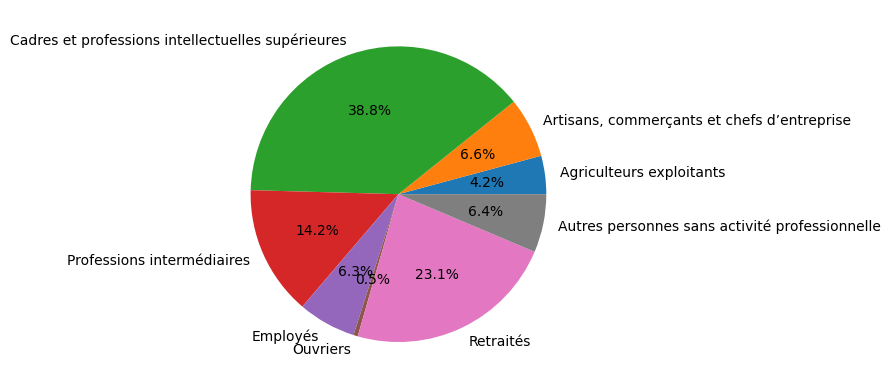

In [117]:
nomcatsocio=['Agriculteurs exploitants','Artisans, commerçants et chefs d’entreprise', 'Cadres et professions intellectuelles supérieures', 'Professions intermédiaires','Employés', 'Ouvriers','Retraités','Autres personnes sans activité professionnelle']
plt.pie(catsocio.size(), labels=nomcatsocio,autopct='%1.1f%%')

On observe donc une majorité d'élus chez les cadres et une très faible proportion chez les ouvriers.

#### 3.5.2 Répartition des élus ayant une fonction particulière par groupe socio-professionnel

In [27]:
dfbase["Libellé de la fonction"].unique()

array([nan, '9ème Vice-président du conseil départemental',
       '7ème Vice-président du conseil départemental',
       '4ème Vice-président du conseil départemental',
       '2ème Vice-président du conseil départemental',
       '1er Vice-président du conseil départemental',
       '3ème Vice-président du conseil départemental',
       '6ème Vice-président du conseil départemental',
       '10ème Vice-président du conseil départemental',
       'Président du conseil départemental',
       '11ème Vice-président du conseil départemental',
       '8ème Vice-président du conseil départemental',
       '12ème Vice-président du conseil départemental',
       '5ème Vice-président du conseil départemental',
       '13ème Vice-président du conseil départemental',
       '14ème Vice-président du conseil départemental',
       '15ème Vice-président du conseil départemental',
       'Président de commission du conseil départemental'], dtype=object)

- On étudie seulement ceux dont la fonction est précisée

Groupe socio-professionnel
1     53
2     78
3    447
4    132
5     53
6      3
7    291
8     89
dtype: int64


([<matplotlib.patches.Wedge at 0x27fc7f1f890>,
 [Text(1.0884100701017994, 0.1592592832490357, 'Agriculteurs exploitants'),
  Text(0.9630061104382985, 0.5316194421374182, 'Artisans, commerçants et chefs d’entreprise'),
  Text(-0.4006718083672006, 1.0244325756143042, 'Cadres et professions intellectuelles supérieures'),
  Text(-1.0177039261552303, -0.4174670270670846, 'Professions intermédiaires'),
  Text(-0.6868485782608446, -0.859208374342951, 'Employés'),
  Text(-0.5473863513883865, -0.9541321618694708, 'Ouvriers'),
  Text(0.309379759225596, -1.055596591781876, 'Retraités'),
  Text(1.0674224619013652, -0.2657240821386511, 'Autres personnes sans activité professionnelle')],
 [Text(0.5936782200555268, 0.08686869995401947, '4.6%'),
  Text(0.5252760602390718, 0.28997424116586445, '6.8%'),
  Text(-0.21854825910938214, 0.5587814048805295, '39.0%'),
  Text(-0.5551112324483073, -0.227709287491137, '11.5%'),
  Text(-0.3746446790513697, -0.46865911327797327, '4.6%'),
  Text(-0.29857437348457444

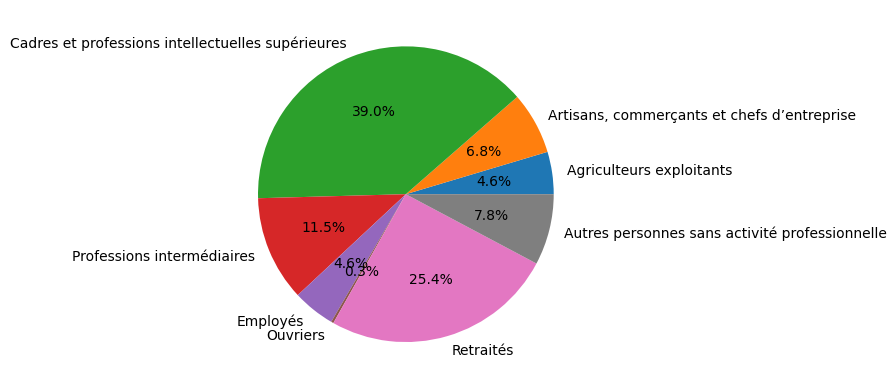

In [118]:
dfelusimp=dfbase[dfbase["Libellé de la fonction"].notna()]
catsocio2=dfelusimp.groupby(by='Groupe socio-professionnel')
print(catsocio2.size()) 
plt.pie(catsocio2.size(), labels=nomcatsocio,autopct='%1.1f%%')



On observe très peu de changement de répartition par rapport à l'ensemble des élus.

#### 3.5.3 Répartition des présidents du conseil départemental par groupe socio-professionnel

In [29]:
dfpres=dfbase[dfbase["Libellé de la fonction"]=='Président du conseil départemental']
catsociopres=dfpres.groupby(by='Groupe socio-professionnel')
print(catsociopres.size())


Groupe socio-professionnel
1     5
2     9
3    32
4     4
5     1
7    26
8    17
dtype: int64


On observe que la catégorie des ouvriers n'est pas représentée dans les présidents du conseil départemental. <br>
On doit donc faire attention lorsque l'on représente les pourcentages.

([<matplotlib.patches.Wedge at 0x27fc4026e90>,
 [Text(1.0846772774940954, 0.18296230127541913, 'Agriculteurs exploitants'),
  Text(0.8855770444278563, 0.6524977382201587, 'Artisans, commerçants et chefs d’entreprise'),
  Text(-0.46302848162846777, 0.9977998923636121, 'Cadres et professions intellectuelles supérieures'),
  Text(-1.0975435658889452, -0.07347190603066407, 'Professions intermédiaires'),
  Text(-1.0700344874318113, -0.2550023445118518, 'Employés'),
  Text(-0.4630280692735147, -0.9978000837165938, 'Retraités'),
  Text(0.927181224882926, -0.5918910171852563, 'Autres personnes sans activité professionnelle')],
 [Text(0.5916421513604156, 0.09979761887750133, '5.3%'),
  Text(0.4830420242333761, 0.3559078572109956, '9.6%'),
  Text(-0.2525609899791642, 0.5442544867437884, '34.0%'),
  Text(-0.5986601268485154, -0.04007558510763494, '4.3%'),
  Text(-0.5836551749628061, -0.1390921879155555, '1.1%'),
  Text(-0.25256076505828073, -0.544254591118142, '27.7%'),
  Text(0.5057352135725051,

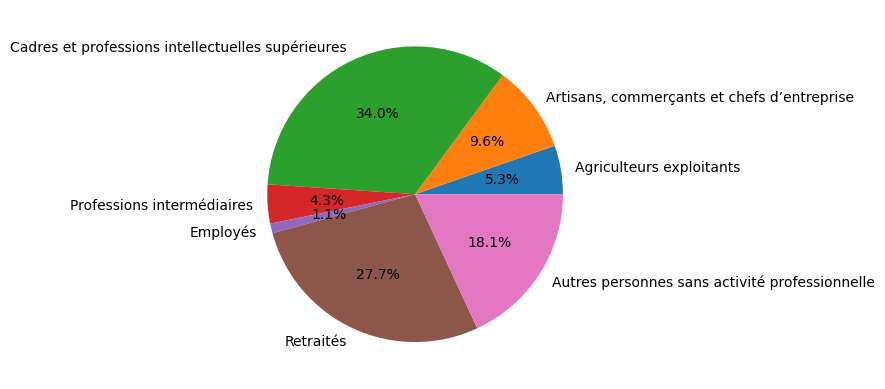

In [30]:
nomcatsociopres=[]
for group in catsociopres :
    nomcatsociopres.append(nomcatsocio[group[0]-1])
plt.pie(catsociopres.size(), labels=nomcatsociopres,autopct='%1.1f%%')


Les proportions restent sensiblement similaires (à l'exception de la proportion de personnes sans activité professionnelle qui double) : les élus important sont ils choisis au hasard?
regarder sur internet


### 3.6 Etude de la répartition des élus par groupe d'age

#### 3.6.1 Répartition de l'ensemble des élus par groupe d'age

C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\2328988711.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nbelusimp=dfbase[dfbase["Libellé de la fonction"].notna()].groupby(by=["Age-classe"]).size().sum()
C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\2328988711.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfelusimp=(dfbase[dfbase["Libellé de la fonction"].notna()].groupby(by=["Age-classe"]).size()/nbelusimp)
C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\2328988711.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ig

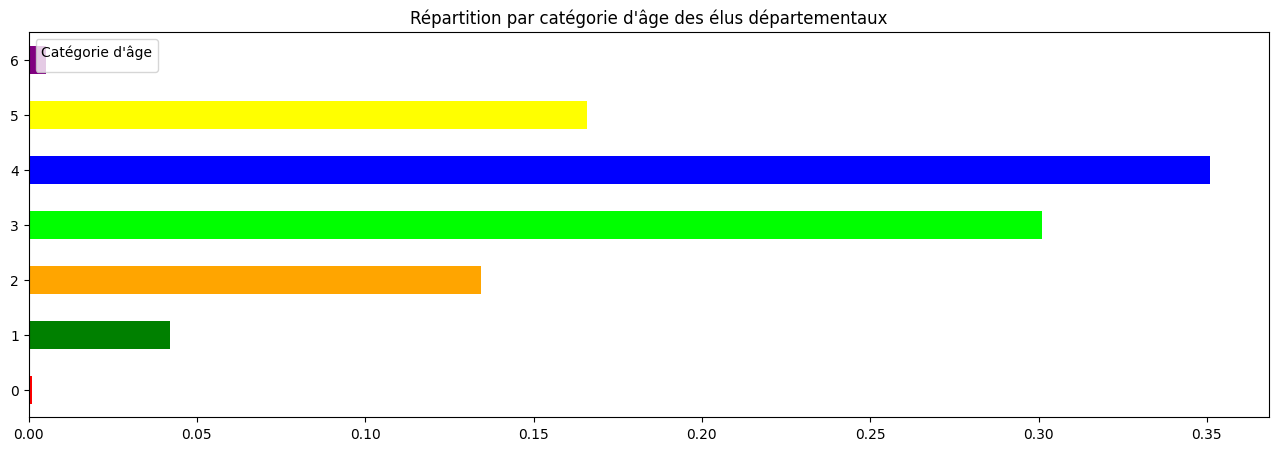

In [155]:
nbelusimp=dfbase[dfbase["Libellé de la fonction"].notna()].groupby(by=["Age-classe"]).size().sum()
dfelusimp=(dfbase[dfbase["Libellé de la fonction"].notna()].groupby(by=["Age-classe"]).size()/nbelusimp)

dfelusimp.plot(kind="barh", stacked= False, color={"red", "orange","yellow","lime","green","blue","purple"}, figsize=(16,5), use_index = False)
plt.title("Répartition par catégorie d'âge des élus départementaux")

plt.legend(title="Catégorie d'âge",loc='upper left')
plt.show()


#### 3.6.2 Répartition des présidents du conseil départemental par groupe d'age

C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\3837565082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nbpres=dfbase[dfbase["Libellé de la fonction"]=='Président du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size().sum()
C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\3837565082.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dftruc=(dfbase[dfbase["Libellé de la fonction"]=='Président du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size()/nbpres).unstack("Age-classe")


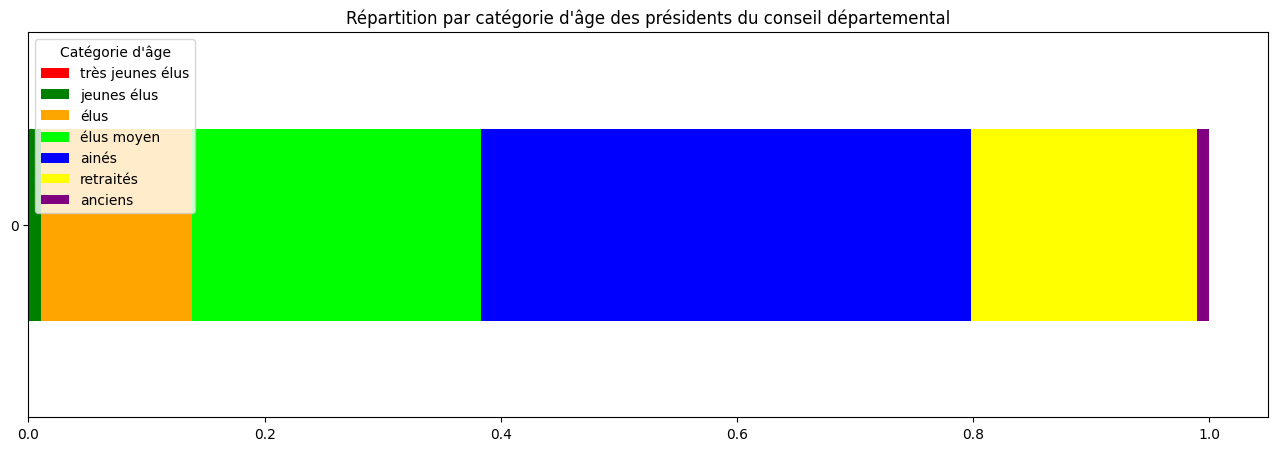

In [138]:
nbpres=dfbase[dfbase["Libellé de la fonction"]=='Président du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size().sum()
dfpres=(dfbase[dfbase["Libellé de la fonction"]=='Président du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size()/nbpres).unstack("Age-classe")
dfpres.plot(kind="barh", stacked = True, color={"red", "orange","yellow","lime","green","blue","purple"}, figsize=(16,5), use_index = False)
plt.title("Répartition par catégorie d'âge des présidents du conseil départemental")
plt.legend(title="Catégorie d'âge",loc='upper left')
plt.show()

#### 3.6.3 Répartition des présidents de commission du conseil départemental par groupe d'age

C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\2476976981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nbpres=dfbase[dfbase["Libellé de la fonction"]=='Président de commission du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size().sum()
C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\2476976981.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dftruc=(dfbase[dfbase["Libellé de la fonction"]=='Président de commission du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size()/nbpres).unstack("Age-classe")


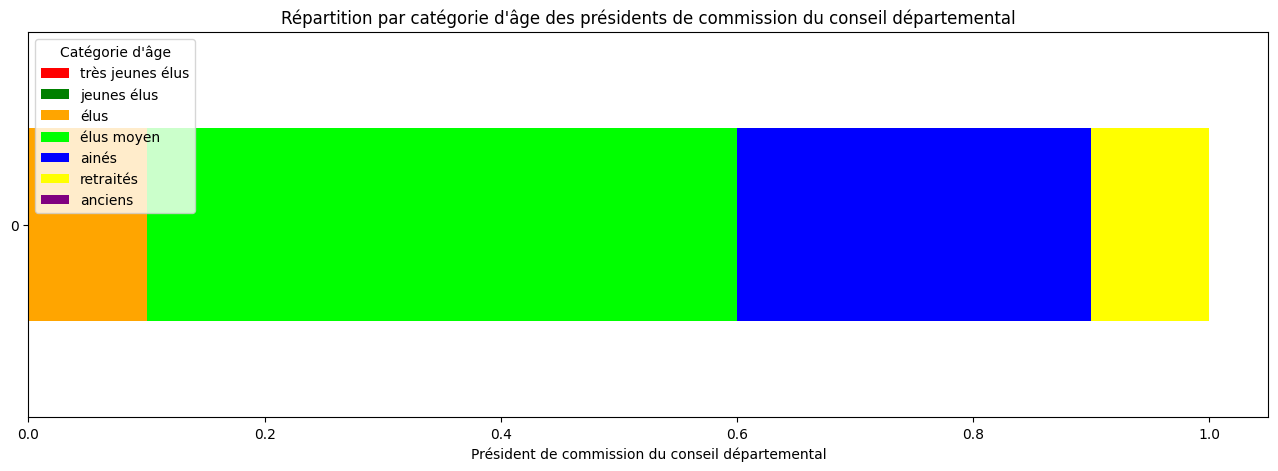

In [140]:
nbpres=dfbase[dfbase["Libellé de la fonction"]=='Président de commission du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size().sum()
dftruc=(dfbase[dfbase["Libellé de la fonction"]=='Président de commission du conseil départemental'].groupby(by=["Libellé de la fonction","Age-classe"]).size()/nbpres).unstack("Age-classe")
dftruc.plot(kind="barh", stacked = True, color={"red", "orange","yellow","lime","green","blue","purple"}, figsize=(16,5), use_index = False)
plt.title("Répartition par catégorie d'âge des présidents de commission du conseil départemental")
plt.xlabel("Président de commission du conseil départemental")

plt.legend(title="Catégorie d'âge",loc='upper left')
plt.show()

#### 3.6.4 Répartition des fonctions par groupe d'age

C:\Users\maxim\AppData\Local\Temp\ipykernel_9220\459084184.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parage=dfbase.groupby(by=["Libellé de la fonction","Age-classe"]).size().unstack("Age-classe")


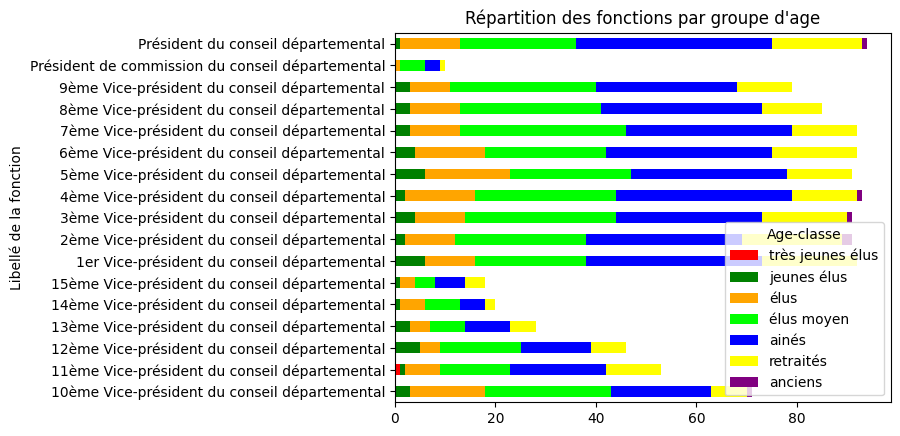

In [143]:
parage=dfbase.groupby(by=["Libellé de la fonction","Age-classe"]).size().unstack("Age-classe")
parage.plot(kind="barh", stacked = True, color={"red", "orange","yellow","lime","green","blue","purple"})
plt.title("Répartition des fonctions par groupe d'age")

plt.show()


In [ ]:

max,min (en age), cut par tranche d'age
importer une colonne avec la population par département